# Imports

In [1]:
pip install Basemap

In [2]:
import numpy as np
import pandas as pd
import warnings
import os
import matplotlib.pyplot as plt
import asyncio
warnings.filterwarnings('ignore')

In [3]:
from mpl_toolkits.basemap import Basemap


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
# Create the directory if it doesn't exist
save_dir = '/content/drive/My Drive/XAI/processedData'
os.makedirs(save_dir, exist_ok=True)

In [7]:
# Load and read the UK data
df_uk = pd.read_csv(os.path.join(save_dir, 'new_df_uk.csv'))
df_uk.head()

,month,season,Accident_Severity,Accident_Severity_pred,Longitude,Latitude
0,Dec,Winter,2,2,-2.223483,53.403991
1,Oct,Fall,2,2,0.162341,51.574568
2,Jan,Winter,2,2,-0.813786,53.065317
3,Jun,Summer,2,2,-2.331315,53.401943
4,Dec,Winter,2,2,0.110510,52.212990


In [8]:
# Load and read the US data
df_us = pd.read_csv(os.path.join(save_dir, 'new_df_US.csv'))
df_us.head()

,month,season,Accident_Severity,Accident_Severity_pred
0,Apr,Spring,2,2
1,Sep,Fall,2,2
2,Jun,Summer,2,2
3,Dec,Winter,1,1
4,Jun,Summer,1,1


In [9]:
# Load and read the Ethiopia data
df_ethiopia = pd.read_csv(os.path.join(save_dir, 'new_df_Ethiopia.csv'))
df_ethiopia.head()

,month,season,day_of_week,Accident_Severity,Accident_Severity_pred
0,Apr,Spring,Tues,2,2
1,Apr,Spring,Tues,2,2
2,Apr,Spring,Sat,2,2
3,Apr,Spring,Fri,2,2
4,Apr,Spring,Fri,2,2


# Plot - Month Wise

In [ ]:
def plot_month(dataset , dataset_name):
  # Get all unique severity values
  all_severity_values = set(dataset['Accident_Severity'].unique()).union(dataset['Accident_Severity_pred'].unique())

  # Group by month and accident severity level, count occurrences
  severity_counts_testing = dataset.groupby(['month', 'Accident_Severity']).size().unstack(fill_value=0)
  severity_counts_predicted = dataset.groupby(['month', 'Accident_Severity_pred']).size().unstack(fill_value=0)

  # Ensure all unique severity values appear as columns
  severity_counts_testing = severity_counts_testing.reindex(columns=all_severity_values, fill_value=0)
  severity_counts_predicted = severity_counts_predicted.reindex(columns=all_severity_values, fill_value=0)

  # Reset index
  severity_counts_testing.reset_index(inplace=True)
  severity_counts_predicted.reset_index(inplace=True)

  # Remove the name associated with the index
  severity_counts_testing.columns.name = None
  severity_counts_predicted.columns.name = None

  # Get unique months present in the dataset
  unique_months = dataset['month'].unique()

  # Define the custom order for the rows based on the unique months present in the dataset
  custom_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
  custom_order = [month for month in custom_order if month[:3] in unique_months]  # Filter out months not present in the dataset

  # Reorder the rows based on the custom order
  severity_counts_testing = severity_counts_testing.set_index('month').loc[custom_order].reset_index()
  severity_counts_predicted = severity_counts_predicted.set_index('month').loc[custom_order].reset_index()

  # Set the width of the bars
  bar_width = 0.2

  # Set the x position of the bars
  r = np.arange(len(severity_counts_testing['month']))

  # Plotting
  plt.figure(figsize=(18, 6))

  for i, (data, title) in enumerate(zip([severity_counts_testing, severity_counts_predicted], ['Testing', 'Predicted'])):
      plt.subplot(1, 2, i+1)
      num_severities = len(data.columns) - 1  # Number of severity levels
      colors = plt.cm.get_cmap('viridis', num_severities)  # Dynamically generate colors
      labels = [f'Severity {i}' for i in range(num_severities)]  # Generate labels dynamically

      for j in range(num_severities):
          plt.bar(r + j * bar_width, data.iloc[:, j+1], color=colors(j/num_severities), width=bar_width, label=labels[j])
          for k, val in enumerate(data.iloc[:, j+1]):
              plt.text(r[k] + j * bar_width, val + 1, str(val), ha='center', va='bottom')

      plt.xlabel('Month')
      plt.ylabel('Count')
      plt.title(f'Severity Counts for {title} Data - {dataset_name}')
      plt.xticks([r + bar_width for r in range(len(data['month']))], custom_order)  # Use custom order for x-axis ticks
      plt.legend()

  plt.tight_layout()
  plt.show()

  # # Save the plots
  # plt_name = "month_wise_accident_counts_" + dataset_name + ".png"
  # plt.savefig(os.path.join(save_dir, plt_name) , dpi=300)

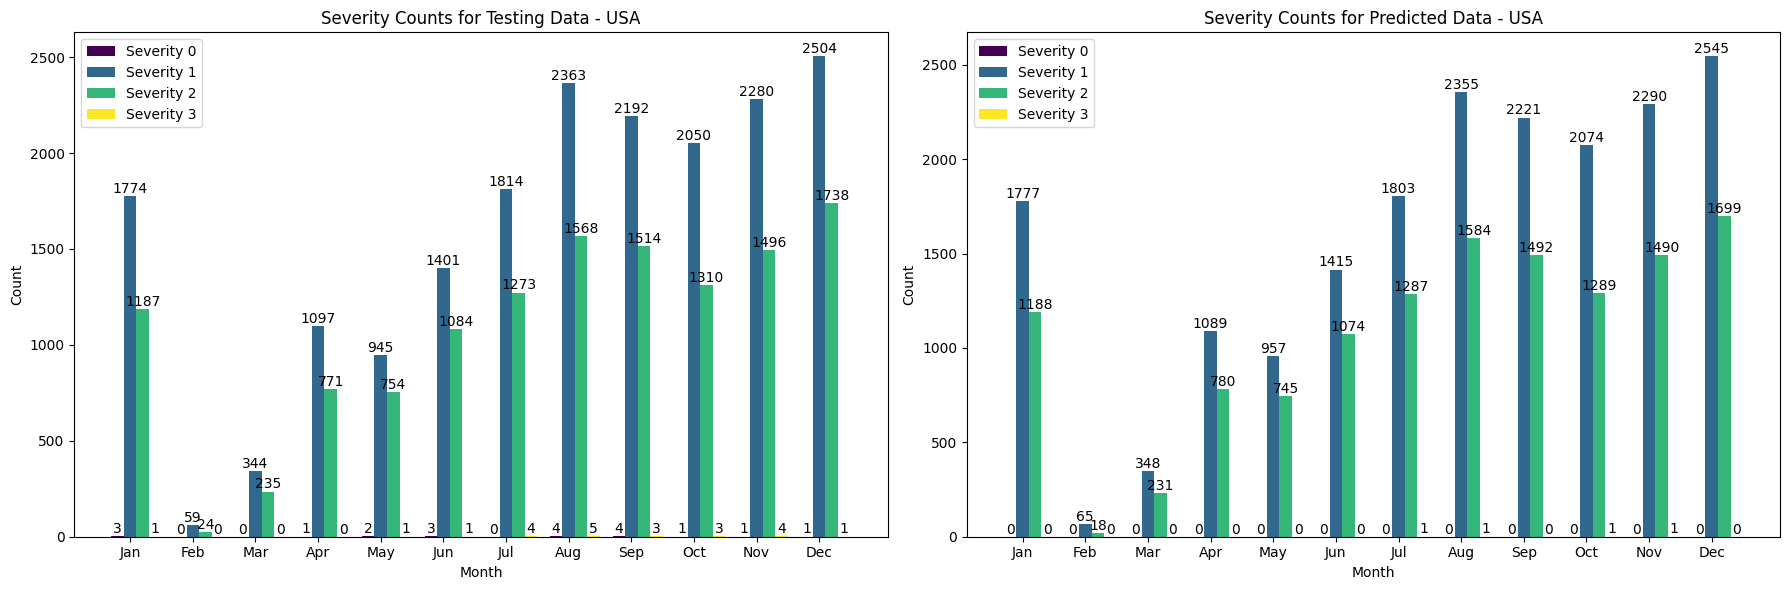

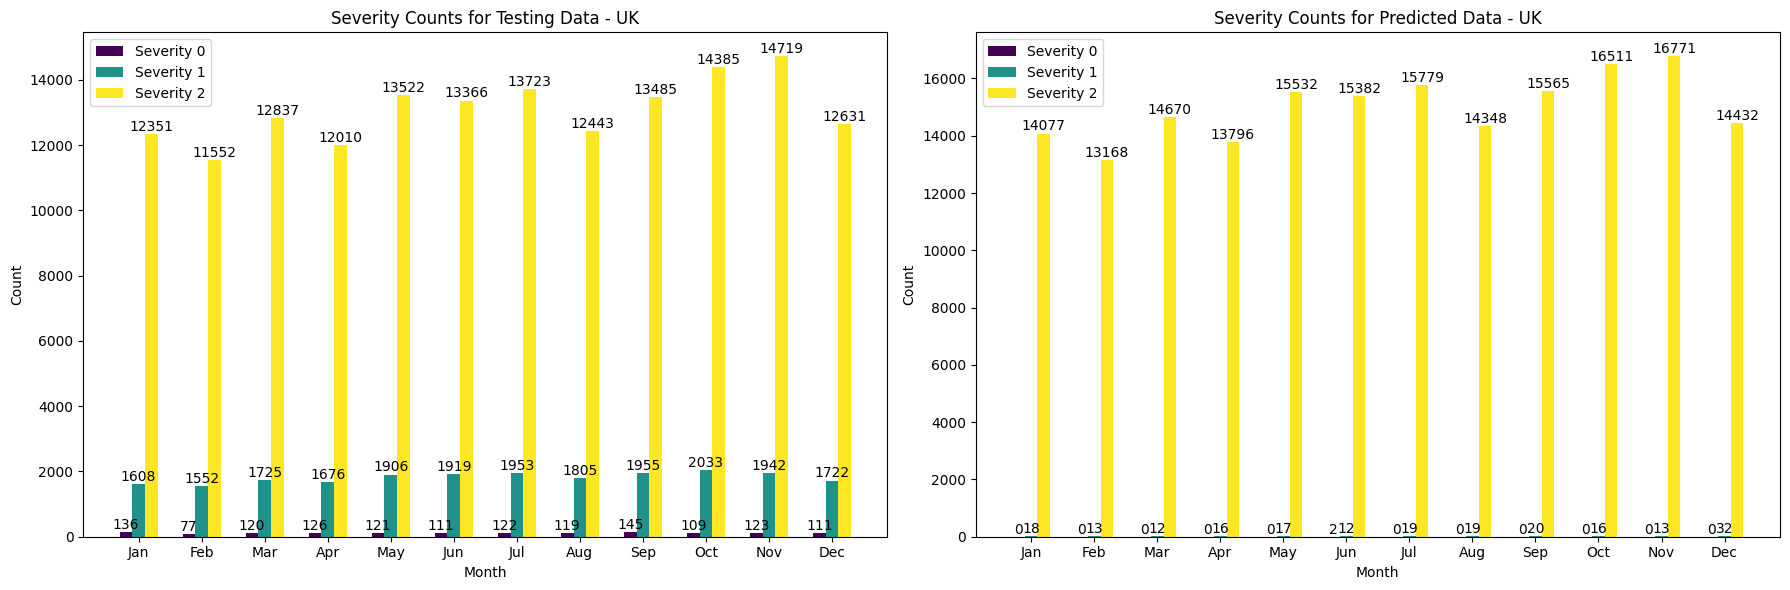

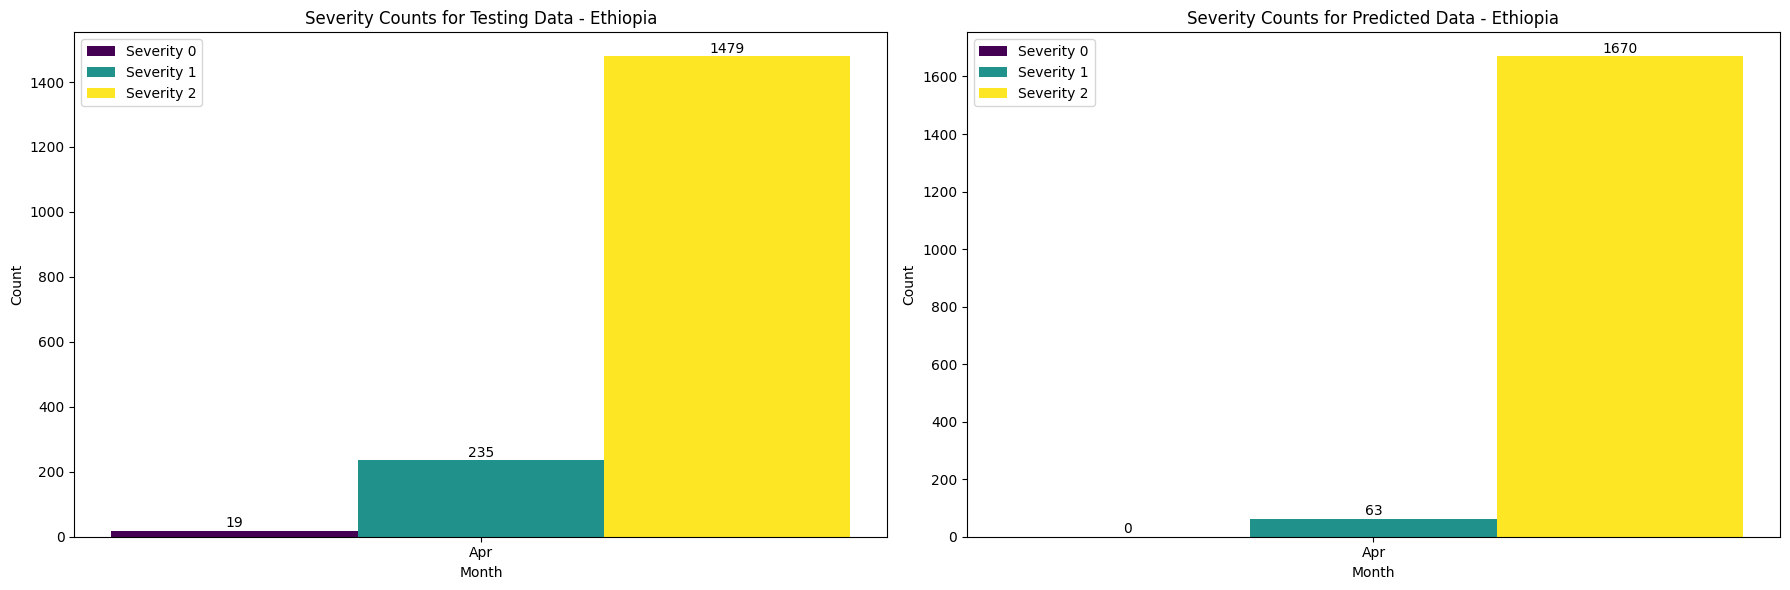

In [ ]:
plot_month(df_us , "USA")
plot_month(df_uk , "UK")
plot_month(df_ethiopia , "Ethiopia")

# Plot - Season Wise

In [ ]:
def plot_season(dataset, dataset_name):
    # Get all unique severity values
    all_severity_values = set(dataset['Accident_Severity'].unique()).union(dataset['Accident_Severity_pred'].unique())

    # Group by season and accident severity level, count occurrences
    severity_counts_testing = dataset.groupby(['season', 'Accident_Severity']).size().unstack(fill_value=0)
    severity_counts_predicted = dataset.groupby(['season', 'Accident_Severity_pred']).size().unstack(fill_value=0)

    # Ensure all unique severity values appear as columns
    severity_counts_testing = severity_counts_testing.reindex(columns=all_severity_values, fill_value=0)
    severity_counts_predicted = severity_counts_predicted.reindex(columns=all_severity_values, fill_value=0)

    # Reset index
    severity_counts_testing.reset_index(inplace=True)
    severity_counts_predicted.reset_index(inplace=True)

    # Remove the name associated with the index
    severity_counts_testing.columns.name = None
    severity_counts_predicted.columns.name = None

    # Get unique seasons present in the dataset
    unique_seasons = dataset['season'].unique()

    # Define the custom order for the rows based on the unique seasons present in the dataset
    custom_order = ['Winter', 'Spring', 'Summer', 'Fall']
    custom_order = [season for season in custom_order if season in unique_seasons]

    # Reorder the rows based on the custom order
    severity_counts_testing = severity_counts_testing.set_index('season').loc[custom_order].reset_index()
    severity_counts_predicted = severity_counts_predicted.set_index('season').loc[custom_order].reset_index()

    # Set the width of the bars
    bar_width = 0.2

    # Set the x position of the bars
    r = np.arange(len(severity_counts_testing['season']))

    # Plotting
    plt.figure(figsize=(18, 6))

    for i, (data, title) in enumerate(zip([severity_counts_testing, severity_counts_predicted], ['Testing', 'Predicted'])):
        plt.subplot(1, 2, i+1)
        num_severities = len(data.columns) - 1  # Number of severity levels
        colors = plt.cm.get_cmap('viridis', num_severities)  # Dynamically generate colors
        labels = [f'Severity {i}' for i in range(num_severities)]  # Generate labels dynamically

        for j in range(num_severities):
            plt.bar(r + j * bar_width, data.iloc[:, j+1], color=colors(j/num_severities), width=bar_width, label=labels[j])
            for k, val in enumerate(data.iloc[:, j+1]):
                plt.text(r[k] + j * bar_width, val + 1, str(val), ha='center', va='bottom')

        plt.xlabel('Season')
        plt.ylabel('Count')
        plt.title(f'Severity Counts for {title} Data - {dataset_name}')
        plt.xticks([r + bar_width for r in range(len(data['season']))], custom_order)  # Use custom order for x-axis ticks
        plt.legend()

    plt.tight_layout()
    plt.show()

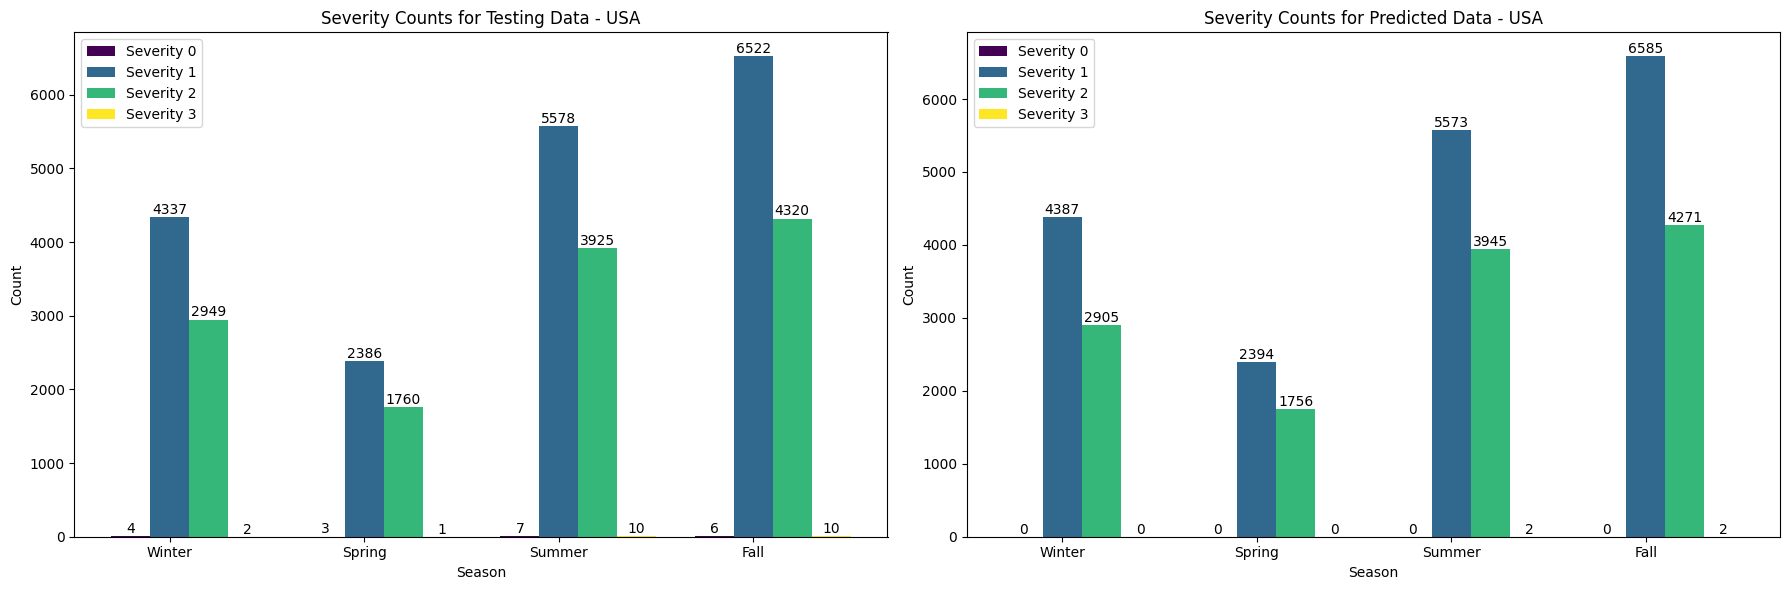

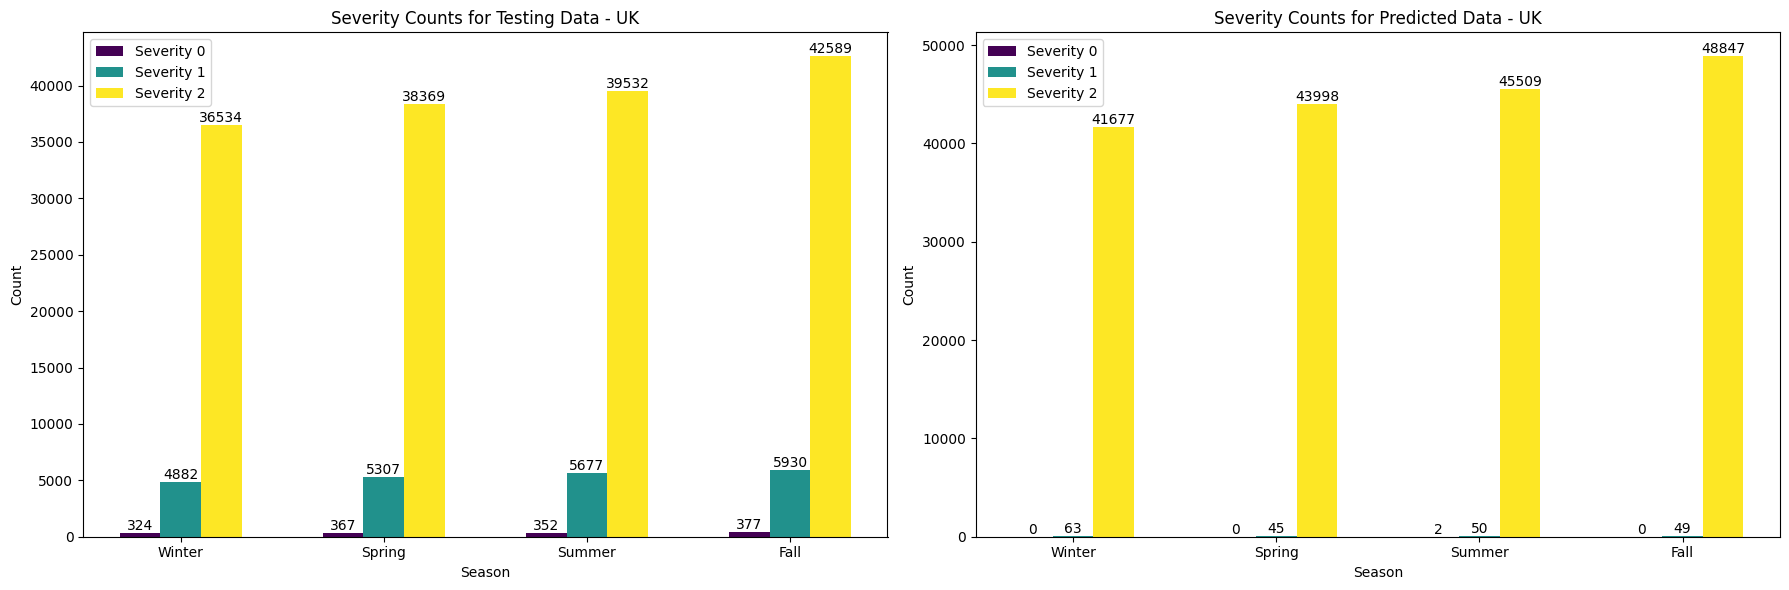

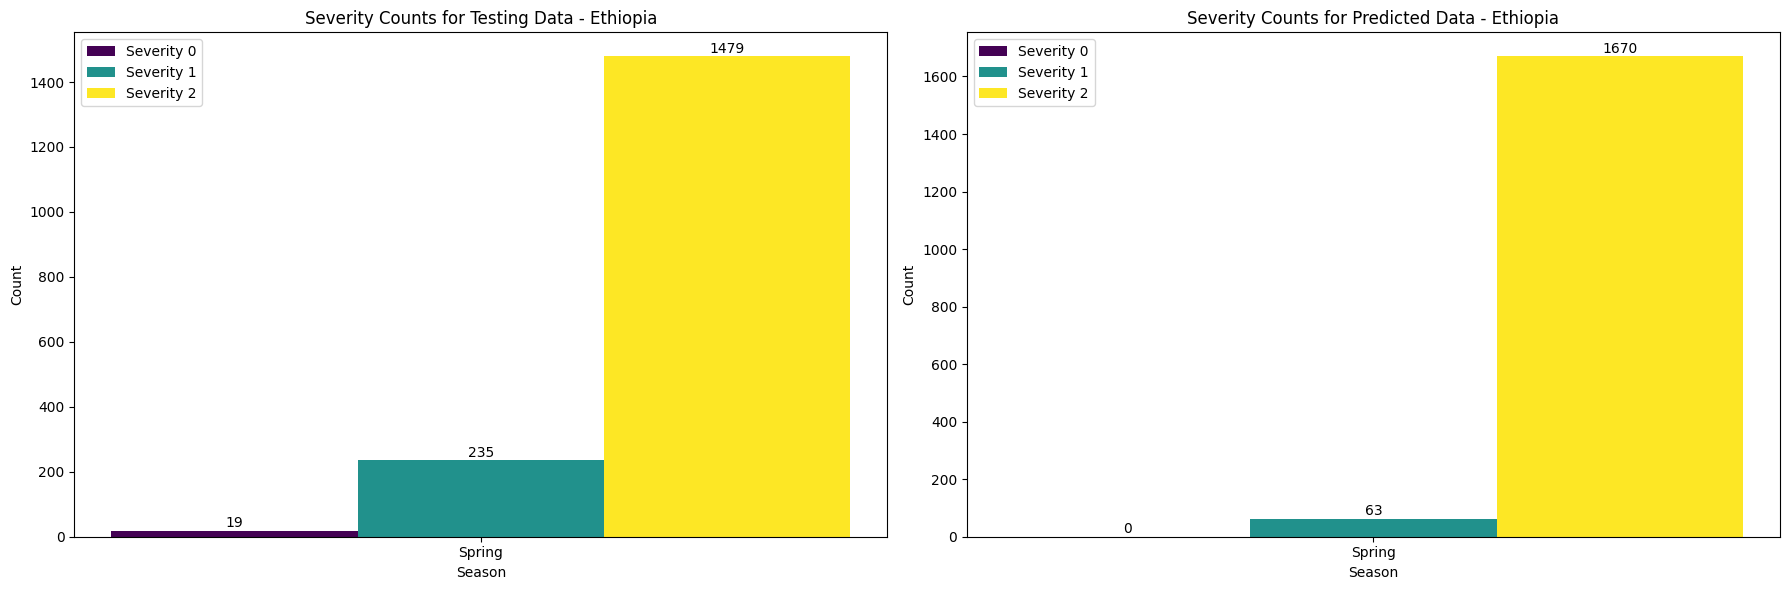

In [ ]:
plot_season(df_us , "USA")
plot_season(df_uk , "UK")
plot_season(df_ethiopia , "Ethiopia")

# Plot - Days Wise

In [ ]:
def plot_day_of_week(dataset, dataset_name):
    # Get all unique severity values
    all_severity_values = set(dataset['Accident_Severity'].unique()).union(dataset['Accident_Severity_pred'].unique())

    # Group by week of day and accident severity level, count occurrences
    severity_counts_testing = dataset.groupby(['day_of_week', 'Accident_Severity']).size().unstack(fill_value=0)
    severity_counts_predicted = dataset.groupby(['day_of_week', 'Accident_Severity_pred']).size().unstack(fill_value=0)

    # Ensure all unique severity values appear as columns
    severity_counts_testing = severity_counts_testing.reindex(columns=all_severity_values, fill_value=0)
    severity_counts_predicted = severity_counts_predicted.reindex(columns=all_severity_values, fill_value=0)

    # Reset index
    severity_counts_testing.reset_index(inplace=True)
    severity_counts_predicted.reset_index(inplace=True)

    # Remove the name associated with the index
    severity_counts_testing.columns.name = None
    severity_counts_predicted.columns.name = None

    # Get unique week of days present in the dataset
    unique_week_of_days = dataset['day_of_week'].unique()

    # Define the custom order for the rows based on the unique week of days present in the dataset
    custom_order = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
    custom_order = [week_of_day for week_of_day in custom_order if week_of_day in unique_week_of_days]

    # Reorder the rows based on the custom order
    severity_counts_testing = severity_counts_testing.set_index('day_of_week').loc[custom_order].reset_index()
    severity_counts_predicted = severity_counts_predicted.set_index('day_of_week').loc[custom_order].reset_index()

    # Set the width of the bars
    bar_width = 0.2

    # Set the x position of the bars
    r = np.arange(len(severity_counts_testing['day_of_week']))

    # Plotting
    plt.figure(figsize=(18, 6))

    for i, (data, title) in enumerate(zip([severity_counts_testing, severity_counts_predicted], ['Testing', 'Predicted'])):
        plt.subplot(1, 2, i+1)
        num_severities = len(data.columns) - 1  # Number of severity levels
        colors = plt.cm.get_cmap('viridis', num_severities)  # Dynamically generate colors
        labels = [f'Severity {i}' for i in range(num_severities)]  # Generate labels dynamically

        for j in range(num_severities):
            plt.bar(r + j * bar_width, data.iloc[:, j+1], color=colors(j/num_severities), width=bar_width, label=labels[j])
            for k, val in enumerate(data.iloc[:, j+1]):
                plt.text(r[k] + j * bar_width, val + 1, str(val), ha='center', va='bottom')

        plt.xlabel('Week of Day')
        plt.ylabel('Count')
        plt.title(f'Severity Counts for {title} Data - {dataset_name}')
        plt.xticks([r + bar_width for r in range(len(data['day_of_week']))], custom_order)  # Use custom order for x-axis ticks
        plt.legend()

    plt.tight_layout()
    plt.show()


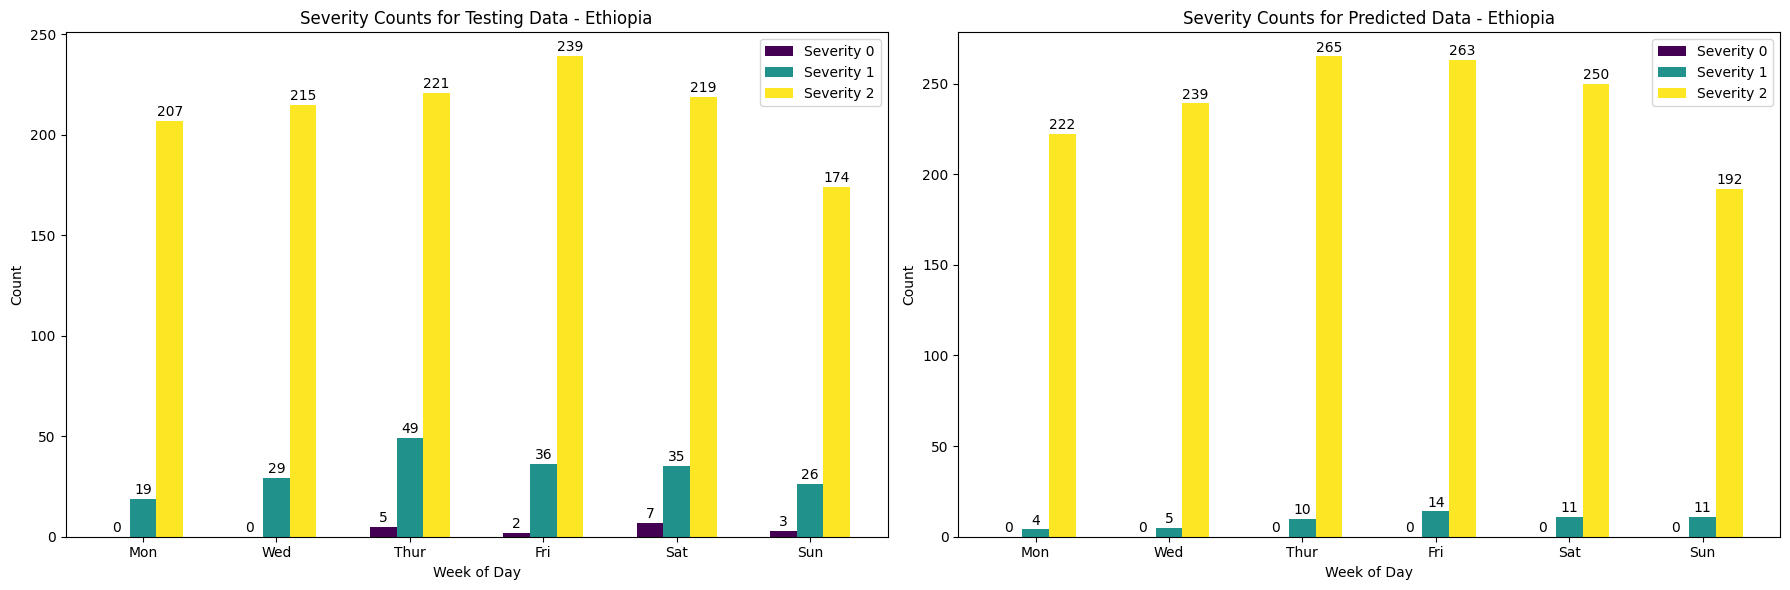

In [ ]:
plot_day_of_week(df_ethiopia , "Ethiopia")

# HeatMap - UK

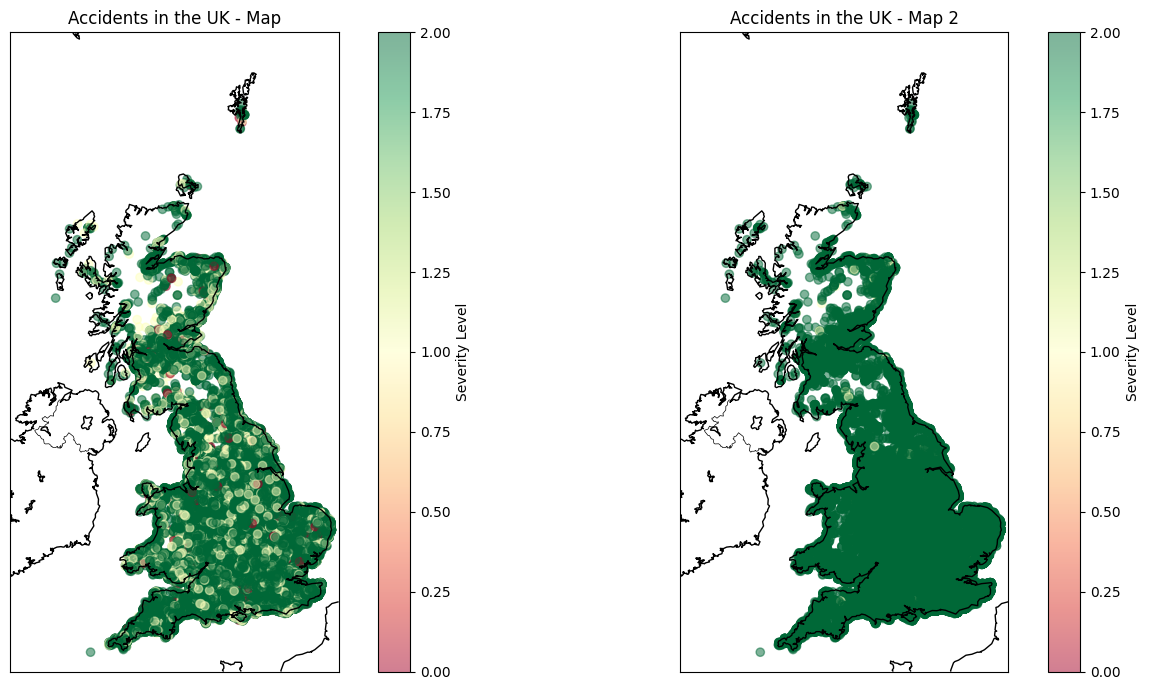

In [10]:
# Create DataFrame for testing
testing_df = df_uk[['Accident_Severity', 'Longitude', 'Latitude']].copy()
predicted_df = df_uk[['Accident_Severity_pred', 'Longitude', 'Latitude']].copy()

# Create a figure with two axes
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Loop through axes and datasets
for i, (df, title) in enumerate(zip([testing_df, predicted_df], ['Map', 'Map 2'])):
    ax = axes[i]
    uk_map = Basemap(
        ax=ax,
        projection='merc',
        llcrnrlat=49.5,
        urcrnrlat=61.5,
        llcrnrlon=-9.0,
        urcrnrlon=2.0,
        resolution='i'
    )
    x, y = uk_map(df['Longitude'].values, df['Latitude'].values)
    uk_map.drawcoastlines()
    uk_map.drawcountries()
    if 'Accident_Severity' in df.columns:
        c_label = 'Accident_Severity'
    else:
        c_label = 'Accident_Severity_pred'
    sc = uk_map.scatter(x, y, c=df[c_label], cmap='RdYlGn', alpha=0.5)
    ax.set_title(f'Accidents in the UK - {title}')
    plt.colorbar(sc, ax=ax, label='Severity Level')

plt.tight_layout()
plt.show()
